In [1]:
MODEL_LAYERS = {
    "google/gemma-3-270m-it": 18,
    "google/gemma-3-4b-it": 34, 
    "google/gemma-3-12b-it": 48,
    "Qwen/Qwen3-1.7B": 28,
    "Qwen/Qwen3-8b": 36,
    "Qwen/Qwen3-14B": 40,
    "EleutherAI/pythia-70m": 6,
    "EleutherAI/pythia-410m": 24,
    "EleutherAI/pythia-160m": 12,
}


Processing model: pythia-70m
Loaded 5 LSS language concept results
Loaded 5 LSS safety concept results
Loaded 5 LSS random concept results
Loaded 5 LSS random1 concept results
Loaded 5 LSS random2 concept results
Loaded 5 LSS random3 concept results
Loaded 5 LSR language concept results
Loaded 5 LSR safety concept results
Loaded 5 LSR random concept results
Loaded 5 LSR random1 concept results
Loaded 5 LSR random2 concept results
Loaded 5 LSR random3 concept results

Processing model: pythia-160m
Loaded 11 LSS language concept results
Loaded 11 LSS safety concept results
Loaded 11 LSS random concept results
Loaded 11 LSS random1 concept results
Loaded 11 LSS random2 concept results
Loaded 11 LSS random3 concept results
Loaded 11 LSR language concept results
Loaded 11 LSR safety concept results
Loaded 11 LSR random concept results
Loaded 11 LSR random1 concept results
Loaded 11 LSR random2 concept results
Loaded 11 LSR random3 concept results


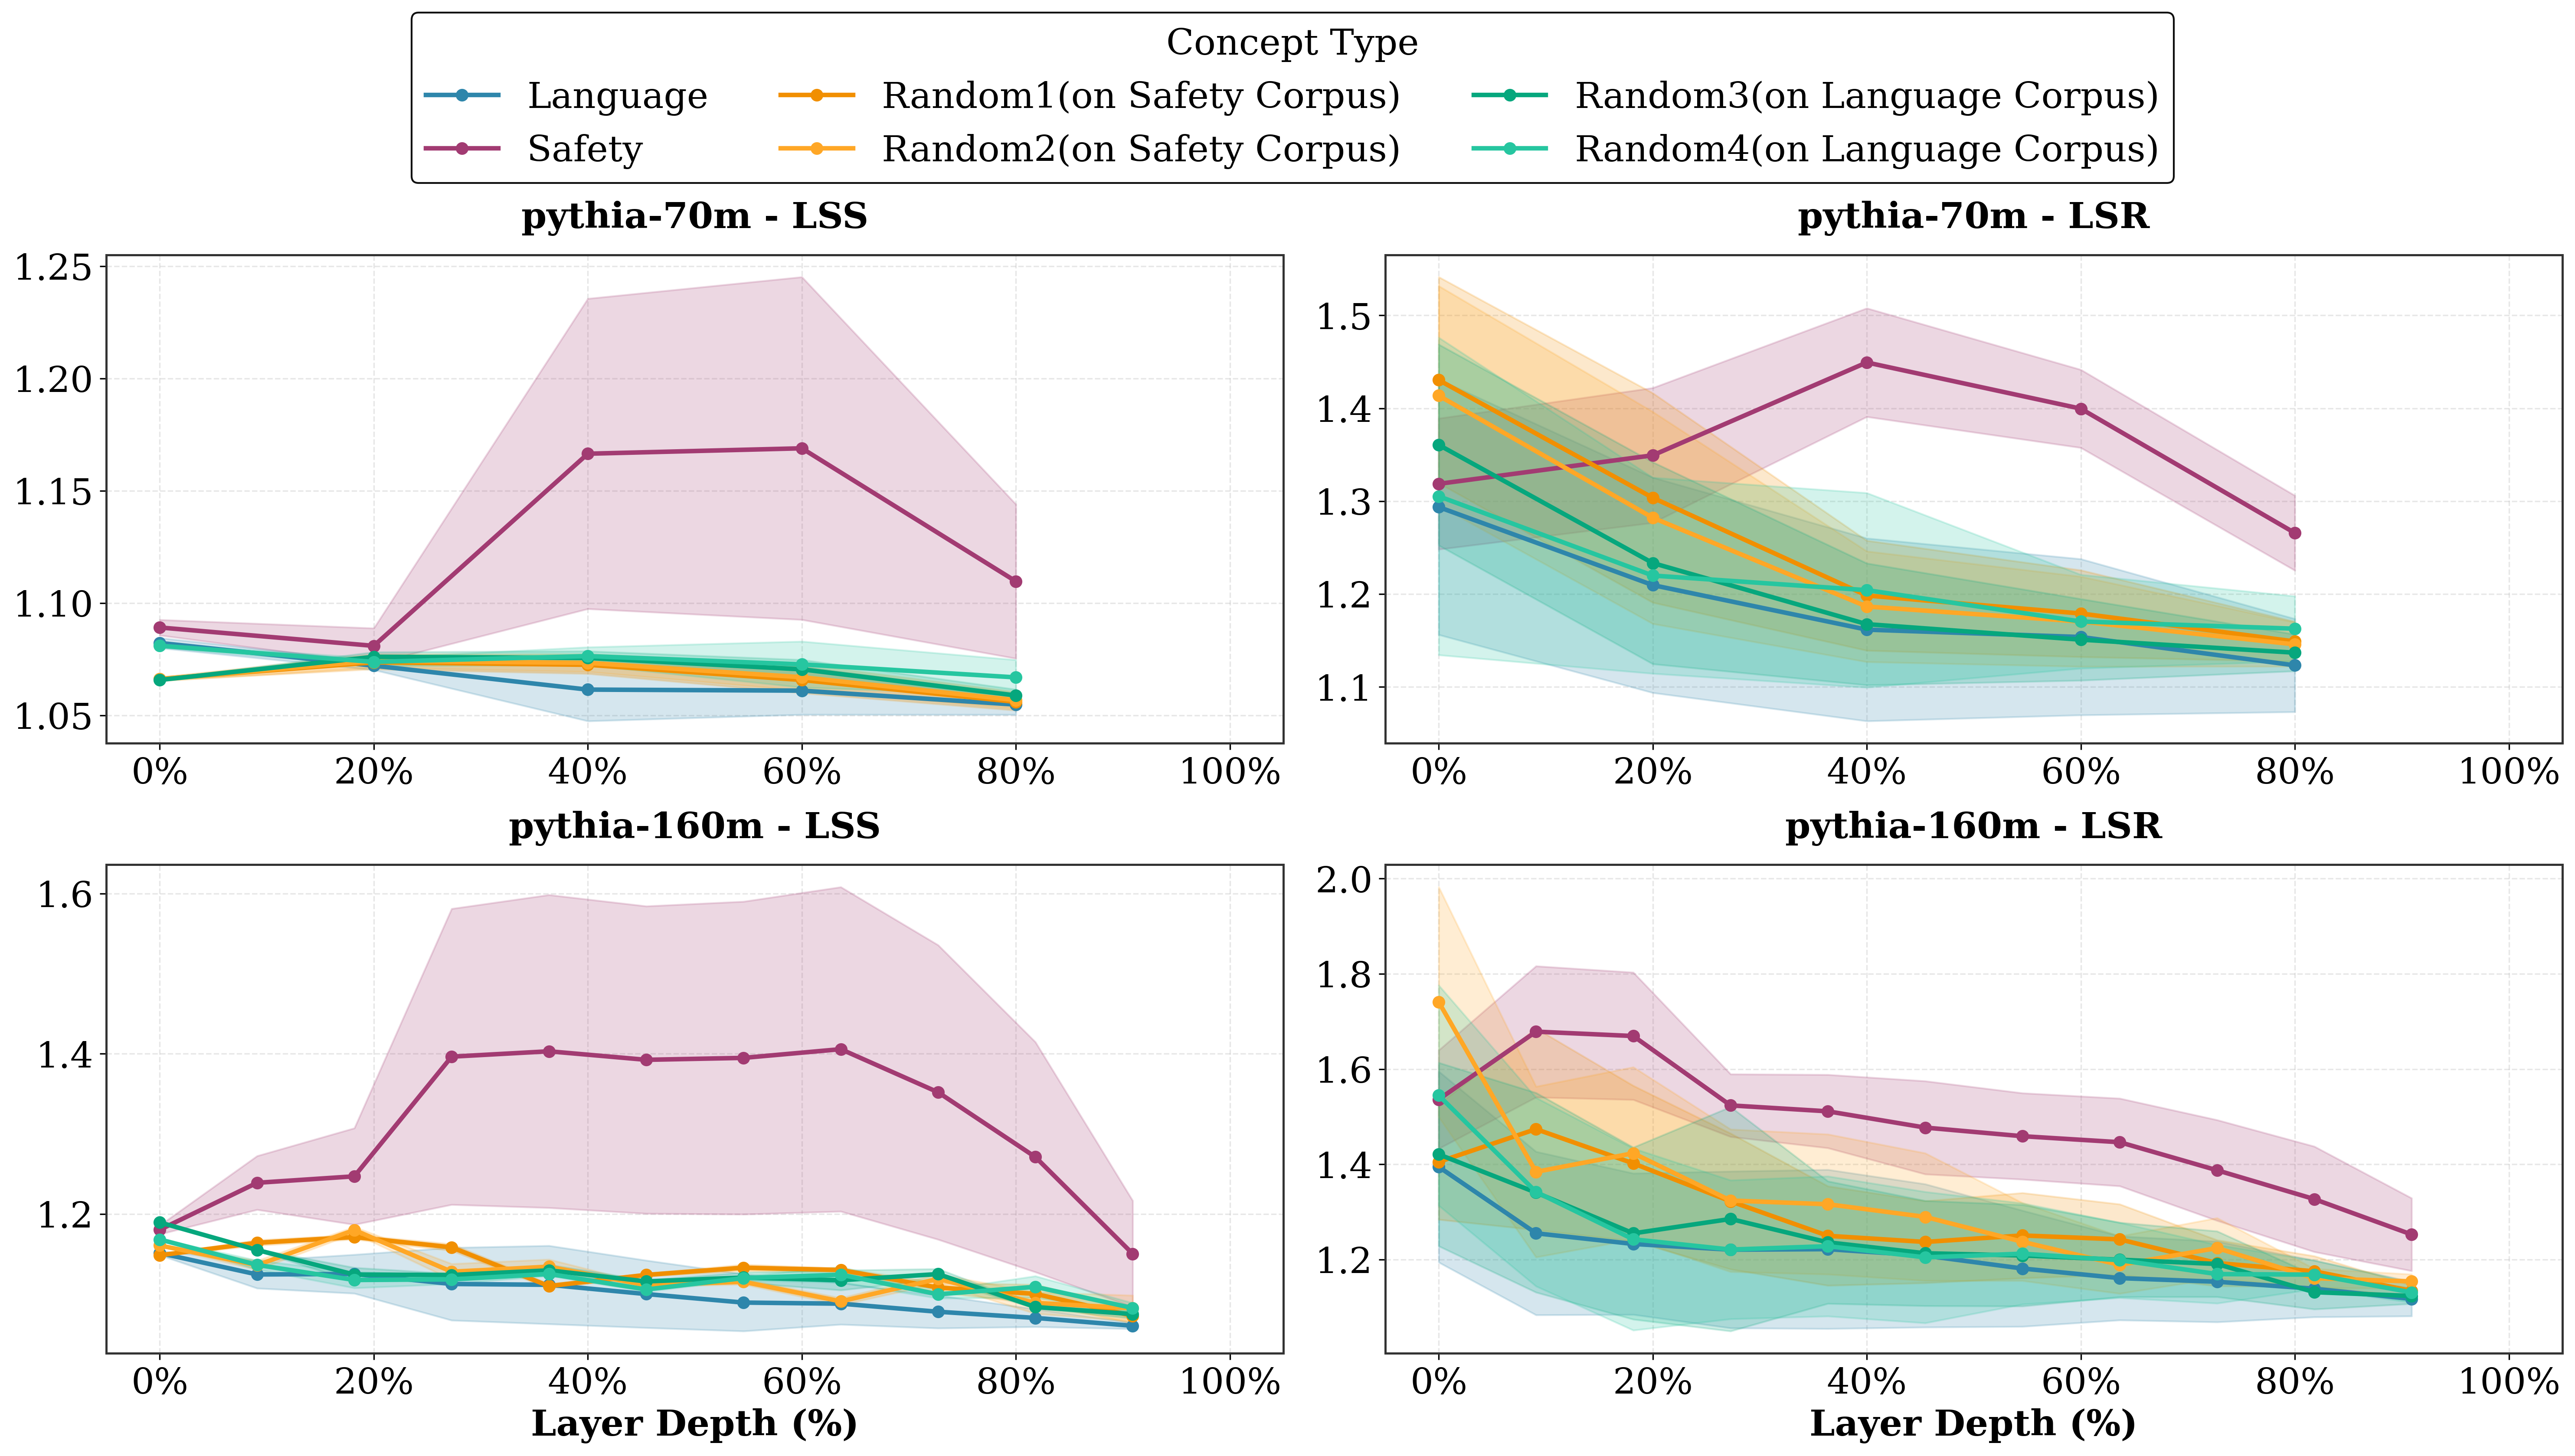

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

# Set publication-quality style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 13
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 2

# Define models and their layer counts
models = {
    'pythia-70m': 6,
    'pythia-160m': 12
}

# Define a sophisticated color palette
colors = {
    'Language': '#2E86AB',  # Professional blue
    'Safety': '#A23B72',     # Deep magenta
    'Random': '#F18F01',     # Warm orange
    'Random1': '#FFA726',    # Similar orange (lighter)
    'Random2': '#06A77D',    # Teal
    'Random3': '#26C6A0'     # Similar teal (lighter)
}

concept_dict = {
    'Language': 'Language',
    'Safety': 'Safety',
    'Random': 'Random1(on Safety Corpus)',
    'Random1': 'Random2(on Safety Corpus)',
    'Random2': 'Random3(on Language Corpus)',
    'Random3': 'Random4(on Language Corpus)'
}
# Create figure with 2 rows (models) x 2 columns (LSS, LSR)
fig, axes = plt.subplots(2, 2, figsize=(20, 10), dpi=300)

for row_idx, (model_name, num_layers) in enumerate(models.items()):
    print(f"\nProcessing model: {model_name}")
    
    # Load LSS results
    lss_lang_conp = f"../../assets/linearity/{model_name}/lss_language_en_fr_layer{{i}}_wo_remove.pt"
    lss_safe_conp = f"../../assets/linearity/{model_name}/lss_safety_layer{{i}}_wo_remove.pt"
    lss_random_conp = f"../../assets/linearity/{model_name}/lss_random_layer{{i}}_wo_remove.pt"
    lss_random1_conp = f"../../assets/linearity/{model_name}/lss_random1_layer{{i}}_wo_remove.pt"
    lss_random2_conp = f"../../assets/linearity/{model_name}/lss_random2_layer{{i}}_wo_remove.pt"
    lss_random3_conp = f"../../assets/linearity/{model_name}/lss_random3_layer{{i}}_wo_remove.pt"
    
    lss_lang_results = []
    lss_safe_results = []
    lss_random_results = []
    lss_random1_results = []
    lss_random2_results = []
    lss_random3_results = []
    
    for i in range(num_layers - 1):
        lss_lang_results.append(torch.load(lss_lang_conp.format(i=i)))
        lss_safe_results.append(torch.load(lss_safe_conp.format(i=i)))
        lss_random_results.append(torch.load(lss_random_conp.format(i=i)))
        lss_random1_results.append(torch.load(lss_random1_conp.format(i=i)))
        lss_random2_results.append(torch.load(lss_random2_conp.format(i=i)))
        lss_random3_results.append(torch.load(lss_random3_conp.format(i=i)))
    
    print(f"Loaded {len(lss_lang_results)} LSS language concept results")
    print(f"Loaded {len(lss_safe_results)} LSS safety concept results")
    print(f"Loaded {len(lss_random_results)} LSS random concept results")
    print(f"Loaded {len(lss_random1_results)} LSS random1 concept results")
    print(f"Loaded {len(lss_random2_results)} LSS random2 concept results")
    print(f"Loaded {len(lss_random3_results)} LSS random3 concept results")
    
    # Load LSR results
    lsr_lang_conp = f"../../assets/linearity/{model_name}/lsr_language_en_fr_layer{{i}}_wo_remove.pt"
    lsr_safe_conp = f"../../assets/linearity/{model_name}/lsr_safety_layer{{i}}_wo_remove.pt"
    lsr_random_conp = f"../../assets/linearity/{model_name}/lsr_random_layer{{i}}_wo_remove.pt"
    lsr_random1_conp = f"../../assets/linearity/{model_name}/lsr_random1_layer{{i}}_wo_remove.pt"
    lsr_random2_conp = f"../../assets/linearity/{model_name}/lsr_random2_layer{{i}}_wo_remove.pt"
    lsr_random3_conp = f"../../assets/linearity/{model_name}/lsr_random3_layer{{i}}_wo_remove.pt"
    
    lsr_lang_results = []
    lsr_safe_results = []
    lsr_random_results = []
    lsr_random1_results = []
    lsr_random2_results = []
    lsr_random3_results = []
    
    for i in range(num_layers - 1):
        lsr_lang_results.append(torch.load(lsr_lang_conp.format(i=i)))
        lsr_safe_results.append(torch.load(lsr_safe_conp.format(i=i)))
        lsr_random_results.append(torch.load(lsr_random_conp.format(i=i)))
        lsr_random1_results.append(torch.load(lsr_random1_conp.format(i=i)))
        lsr_random2_results.append(torch.load(lsr_random2_conp.format(i=i)))
        lsr_random3_results.append(torch.load(lsr_random3_conp.format(i=i)))
    
    print(f"Loaded {len(lsr_lang_results)} LSR language concept results")
    print(f"Loaded {len(lsr_safe_results)} LSR safety concept results")
    print(f"Loaded {len(lsr_random_results)} LSR random concept results")
    print(f"Loaded {len(lsr_random1_results)} LSR random1 concept results")
    print(f"Loaded {len(lsr_random2_results)} LSR random2 concept results")
    print(f"Loaded {len(lsr_random3_results)} LSR random3 concept results")
    
    # Process LSS data
    lss_data = []
    for i, (lang_val, safe_val, random_val, random1_val, random2_val, random3_val) in enumerate(zip(lss_lang_results, lss_safe_results, lss_random_results, lss_random1_results, lss_random2_results, lss_random3_results)):
        if num_layers > 1:
            layer_percentage = (i / (num_layers - 1)) * 100
        else:
            layer_percentage = 0
        
        for val in lang_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Language'})
        for val in safe_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Safety'})
        for val in random_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random'})
        for val in random1_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random1'})
        for val in random2_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random2'})
        for val in random3_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random3'})
    
    lss_df = pd.DataFrame(lss_data)
    lss_stats_df = lss_df.groupby(['layer', 'concept'])['value'].agg(['mean', 'std']).reset_index()
    
    # Process LSR data
    lsr_data = []
    for i, (lang_val, safe_val, random_val, random1_val, random2_val, random3_val) in enumerate(zip(lsr_lang_results, lsr_safe_results, lsr_random_results, lsr_random1_results, lsr_random2_results, lsr_random3_results)):
        if num_layers > 1:
            layer_percentage = (i / (num_layers - 1)) * 100
        else:
            layer_percentage = 0
        
        for val in lang_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Language'})
        for val in safe_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Safety'})
        for val in random_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random'})
        for val in random1_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random1'})
        for val in random2_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random2'})
        for val in random3_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random3'})
    
    lsr_df = pd.DataFrame(lsr_data)
    lsr_stats_df = lsr_df.groupby(['layer', 'concept'])['value'].agg(['mean', 'std']).reset_index()
    
    # Plot LSS (column 0)
    # ax_lss = axes[0]
    ax_lss = axes[row_idx, 0]
    for concept in ['Language', 'Safety', 'Random', 'Random1', 'Random2', 'Random3']:
        concept_data = lss_stats_df[lss_stats_df['concept'] == concept]
        ax_lss.plot(concept_data['layer'], concept_data['mean'], 
                color=colors[concept], label=concept_dict[concept], 
                linewidth=2.5, marker='o', markersize=6)
        ax_lss.fill_between(concept_data['layer'], 
                        concept_data['mean'] - concept_data['std'],
                        concept_data['mean'] + concept_data['std'],
                        color=colors[concept], alpha=0.2)
    
    ax_lss.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, axis='both')
    ax_lss.set_axisbelow(True)
    if row_idx == len(models) - 1:
        ax_lss.set_xlabel('Layer Depth (%)', fontweight='bold', fontsize=20)
    ax_lss.set_title(f'{model_name} - LSS', fontweight='bold', pad=15, fontsize=20)
    ax_lss.set_xlim(-5, 105)
    ax_lss.set_xticks([0, 20, 40, 60, 80, 100])
    ax_lss.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    for spine in ax_lss.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#333333')
    
    # Plot LSR (column 1)
    # ax_lsr = axes[1]
    ax_lsr = axes[row_idx, 1]
    for concept in ['Language', 'Safety', 'Random', 'Random1', 'Random2', 'Random3']:
        concept_data = lsr_stats_df[lsr_stats_df['concept'] == concept]
        ax_lsr.plot(concept_data['layer'], concept_data['mean'], 
                color=colors[concept], label=concept_dict[concept], 
                linewidth=2.5, marker='o', markersize=6)
        ax_lsr.fill_between(concept_data['layer'], 
                        concept_data['mean'] - concept_data['std'],
                        concept_data['mean'] + concept_data['std'],
                        color=colors[concept], alpha=0.2)
    
    ax_lsr.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, axis='both')
    ax_lsr.set_axisbelow(True)
    if row_idx == len(models) - 1:
        ax_lsr.set_xlabel('Layer Depth (%)', fontweight='bold', fontsize=20)
    ax_lsr.set_title(f'{model_name} - LSR', fontweight='bold', pad=15, fontsize=20)
    ax_lsr.set_xlim(-5, 105)
    ax_lsr.set_xticks([0, 20, 40, 60, 80, 100])
    ax_lsr.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    
    for spine in ax_lsr.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#333333')

# Create a single legend at the top of the figure
handles, labels = axes[0, 0].get_legend_handles_labels()
# Separate handles and labels into two groups
safety_handles = []
safety_labels = []
other_handles = []
other_labels = []

for handle, label in zip(handles, labels):
    if 'Safety' in label or 'safety' in label.lower():
        safety_handles.append(handle)
        safety_labels.append(label)
    else:
        other_handles.append(handle)
        other_labels.append(label)

# Create a single legend with all concepts in one box, split into two rows
fig.legend(handles, labels, title='Concept Type', loc='upper center', 
           bbox_to_anchor=(0.5, 1.13), ncol=3, frameon=True, 
           fancybox=True, shadow=False, framealpha=0.95, 
           edgecolor='black', fontsize=20, title_fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Make room for the legend at the top
plt.savefig('../../assets/figs/linearity/pythia_linearity_wo_remove.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()



Processing model: pythia-70m
Loaded 5 LSS language concept results
Loaded 5 LSS safety concept results
Loaded 5 LSS random concept results
Loaded 5 LSS random1 concept results
Loaded 5 LSS random2 concept results
Loaded 5 LSS random3 concept results
Loaded 5 LSR language concept results
Loaded 5 LSR safety concept results
Loaded 5 LSR random concept results
Loaded 5 LSR random1 concept results
Loaded 5 LSR random2 concept results
Loaded 5 LSR random3 concept results

Processing model: pythia-160m
Loaded 11 LSS language concept results
Loaded 11 LSS safety concept results
Loaded 11 LSS random concept results
Loaded 11 LSS random1 concept results
Loaded 11 LSS random2 concept results
Loaded 11 LSS random3 concept results
Loaded 11 LSR language concept results
Loaded 11 LSR safety concept results
Loaded 11 LSR random concept results
Loaded 11 LSR random1 concept results
Loaded 11 LSR random2 concept results
Loaded 11 LSR random3 concept results


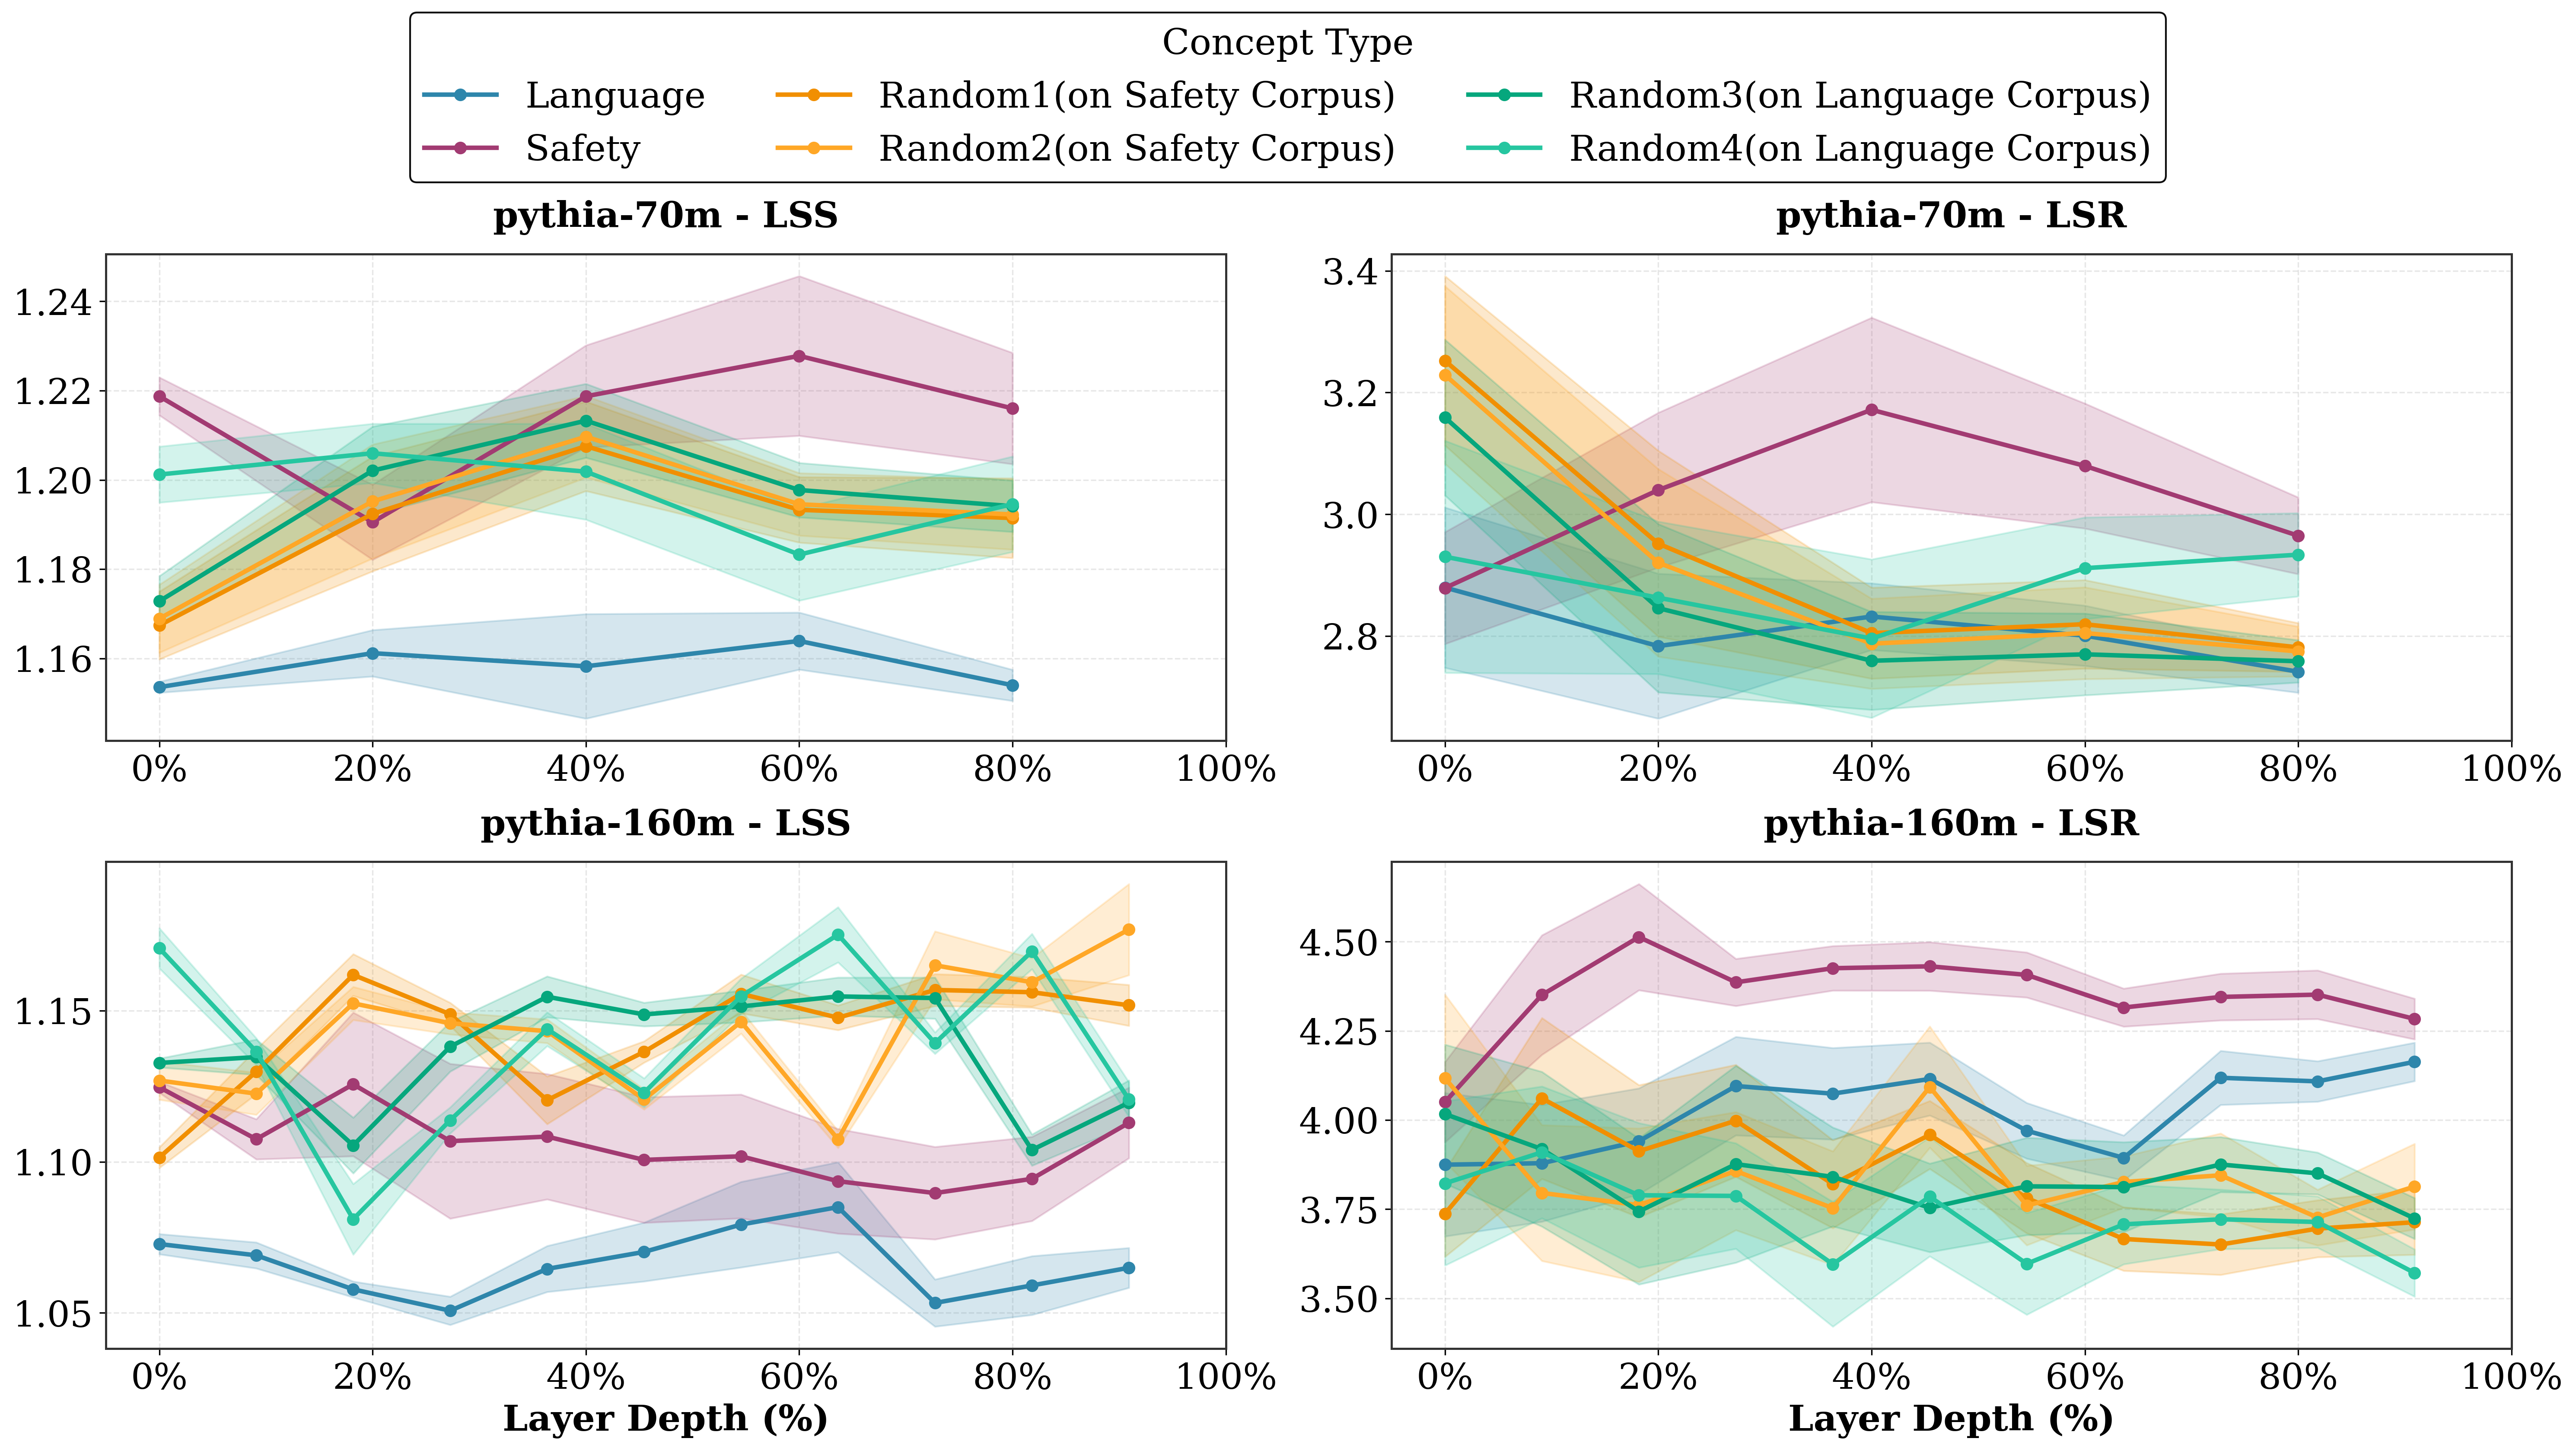

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

# Set publication-quality style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 13
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 2

# Define models and their layer counts
models = {
    'pythia-70m': 6,
    'pythia-160m': 12
}

# Define a sophisticated color palette
colors = {
    'Language': '#2E86AB',  # Professional blue
    'Safety': '#A23B72',     # Deep magenta
    'Random': '#F18F01',     # Warm orange
    'Random1': '#FFA726',    # Similar orange (lighter)
    'Random2': '#06A77D',    # Teal
    'Random3': '#26C6A0'     # Similar teal (lighter)
}

concept_dict = {
    'Language': 'Language',
    'Safety': 'Safety',
    'Random': 'Random1(on Safety Corpus)',
    'Random1': 'Random2(on Safety Corpus)',
    'Random2': 'Random3(on Language Corpus)',
    'Random3': 'Random4(on Language Corpus)'
}
# Create figure with 2 rows (models) x 2 columns (LSS, LSR)
fig, axes = plt.subplots(2, 2, figsize=(20, 10), dpi=300)

for row_idx, (model_name, num_layers) in enumerate(models.items()):
    print(f"\nProcessing model: {model_name}")
    
    # Load LSS results
    lss_lang_conp = f"../../assets/linearity/{model_name}/lss_language_en_fr_layer{{i}}_w_remove.pt"
    lss_safe_conp = f"../../assets/linearity/{model_name}/lss_safety_layer{{i}}_w_remove.pt"
    lss_random_conp = f"../../assets/linearity/{model_name}/lss_random_layer{{i}}_w_remove.pt"
    lss_random1_conp = f"../../assets/linearity/{model_name}/lss_random1_layer{{i}}_w_remove.pt"
    lss_random2_conp = f"../../assets/linearity/{model_name}/lss_random2_layer{{i}}_w_remove.pt"
    lss_random3_conp = f"../../assets/linearity/{model_name}/lss_random3_layer{{i}}_w_remove.pt"
    
    lss_lang_results = []
    lss_safe_results = []
    lss_random_results = []
    lss_random1_results = []
    lss_random2_results = []
    lss_random3_results = []
    
    for i in range(num_layers - 1):
        lss_lang_results.append(torch.load(lss_lang_conp.format(i=i)))
        lss_safe_results.append(torch.load(lss_safe_conp.format(i=i)))
        lss_random_results.append(torch.load(lss_random_conp.format(i=i)))
        lss_random1_results.append(torch.load(lss_random1_conp.format(i=i)))
        lss_random2_results.append(torch.load(lss_random2_conp.format(i=i)))
        lss_random3_results.append(torch.load(lss_random3_conp.format(i=i)))
    
    print(f"Loaded {len(lss_lang_results)} LSS language concept results")
    print(f"Loaded {len(lss_safe_results)} LSS safety concept results")
    print(f"Loaded {len(lss_random_results)} LSS random concept results")
    print(f"Loaded {len(lss_random1_results)} LSS random1 concept results")
    print(f"Loaded {len(lss_random2_results)} LSS random2 concept results")
    print(f"Loaded {len(lss_random3_results)} LSS random3 concept results")
    
    # Load LSR results
    lsr_lang_conp = f"../../assets/linearity/{model_name}/lsr_language_en_fr_layer{{i}}_w_remove.pt"
    lsr_safe_conp = f"../../assets/linearity/{model_name}/lsr_safety_layer{{i}}_w_remove.pt"
    lsr_random_conp = f"../../assets/linearity/{model_name}/lsr_random_layer{{i}}_w_remove.pt"
    lsr_random1_conp = f"../../assets/linearity/{model_name}/lsr_random1_layer{{i}}_w_remove.pt"
    lsr_random2_conp = f"../../assets/linearity/{model_name}/lsr_random2_layer{{i}}_w_remove.pt"
    lsr_random3_conp = f"../../assets/linearity/{model_name}/lsr_random3_layer{{i}}_w_remove.pt"
    
    lsr_lang_results = []
    lsr_safe_results = []
    lsr_random_results = []
    lsr_random1_results = []
    lsr_random2_results = []
    lsr_random3_results = []
    
    for i in range(num_layers - 1):
        lsr_lang_results.append(torch.load(lsr_lang_conp.format(i=i)))
        lsr_safe_results.append(torch.load(lsr_safe_conp.format(i=i)))
        lsr_random_results.append(torch.load(lsr_random_conp.format(i=i)))
        lsr_random1_results.append(torch.load(lsr_random1_conp.format(i=i)))
        lsr_random2_results.append(torch.load(lsr_random2_conp.format(i=i)))
        lsr_random3_results.append(torch.load(lsr_random3_conp.format(i=i)))
    
    print(f"Loaded {len(lsr_lang_results)} LSR language concept results")
    print(f"Loaded {len(lsr_safe_results)} LSR safety concept results")
    print(f"Loaded {len(lsr_random_results)} LSR random concept results")
    print(f"Loaded {len(lsr_random1_results)} LSR random1 concept results")
    print(f"Loaded {len(lsr_random2_results)} LSR random2 concept results")
    print(f"Loaded {len(lsr_random3_results)} LSR random3 concept results")
    
    # Process LSS data
    lss_data = []
    for i, (lang_val, safe_val, random_val, random1_val, random2_val, random3_val) in enumerate(zip(lss_lang_results, lss_safe_results, lss_random_results, lss_random1_results, lss_random2_results, lss_random3_results)):
        if num_layers > 1:
            layer_percentage = (i / (num_layers - 1)) * 100
        else:
            layer_percentage = 0
        
        for val in lang_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Language'})
        for val in safe_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Safety'})
        for val in random_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random'})
        for val in random1_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random1'})
        for val in random2_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random2'})
        for val in random3_val:
            lss_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random3'})
    
    lss_df = pd.DataFrame(lss_data)
    lss_stats_df = lss_df.groupby(['layer', 'concept'])['value'].agg(['mean', 'std']).reset_index()
    
    # Process LSR data
    lsr_data = []
    for i, (lang_val, safe_val, random_val, random1_val, random2_val, random3_val) in enumerate(zip(lsr_lang_results, lsr_safe_results, lsr_random_results, lsr_random1_results, lsr_random2_results, lsr_random3_results)):
        if num_layers > 1:
            layer_percentage = (i / (num_layers - 1)) * 100
        else:
            layer_percentage = 0
        
        for val in lang_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Language'})
        for val in safe_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Safety'})
        for val in random_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random'})
        for val in random1_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random1'})
        for val in random2_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random2'})
        for val in random3_val:
            lsr_data.append({'layer': layer_percentage, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random3'})
    
    lsr_df = pd.DataFrame(lsr_data)
    lsr_stats_df = lsr_df.groupby(['layer', 'concept'])['value'].agg(['mean', 'std']).reset_index()
    
    # Plot LSS (column 0)
    # ax_lss = axes[0]
    ax_lss = axes[row_idx, 0]
    for concept in ['Language', 'Safety', 'Random', 'Random1', 'Random2', 'Random3']:
        concept_data = lss_stats_df[lss_stats_df['concept'] == concept]
        ax_lss.plot(concept_data['layer'], concept_data['mean'], 
                color=colors[concept], label=concept_dict[concept], 
                linewidth=2.5, marker='o', markersize=6)
        ax_lss.fill_between(concept_data['layer'], 
                        concept_data['mean'] - concept_data['std'],
                        concept_data['mean'] + concept_data['std'],
                        color=colors[concept], alpha=0.2)
    
    ax_lss.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, axis='both')
    ax_lss.set_axisbelow(True)
    if row_idx == len(models) - 1:
        ax_lss.set_xlabel('Layer Depth (%)', fontweight='bold', fontsize=20)
    ax_lss.set_title(f'{model_name} - LSS', fontweight='bold', pad=15, fontsize=20)
    ax_lss.set_xlim(-5, 100)
    ax_lss.set_xticks([0, 20, 40, 60, 80, 100])
    ax_lss.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    for spine in ax_lss.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#333333')
    
    # Plot LSR (column 1)
    # ax_lsr = axes[1]
    ax_lsr = axes[row_idx, 1]
    for concept in ['Language', 'Safety', 'Random', 'Random1', 'Random2', 'Random3']:
        concept_data = lsr_stats_df[lsr_stats_df['concept'] == concept]
        ax_lsr.plot(concept_data['layer'], concept_data['mean'], 
                color=colors[concept], label=concept_dict[concept], 
                linewidth=2.5, marker='o', markersize=6)
        ax_lsr.fill_between(concept_data['layer'], 
                        concept_data['mean'] - concept_data['std'],
                        concept_data['mean'] + concept_data['std'],
                        color=colors[concept], alpha=0.2)
    
    ax_lsr.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, axis='both')
    ax_lsr.set_axisbelow(True)
    if row_idx == len(models) - 1:
        ax_lsr.set_xlabel('Layer Depth (%)', fontweight='bold', fontsize=20)
    ax_lsr.set_title(f'{model_name} - LSR', fontweight='bold', pad=15, fontsize=20)
    ax_lsr.set_xlim(-5, 100)
    ax_lsr.set_xticks([0, 20, 40, 60, 80, 100])
    ax_lsr.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    
    for spine in ax_lsr.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#333333')

# Create a single legend at the top of the figure
handles, labels = axes[0, 0].get_legend_handles_labels()
# Separate handles and labels into two groups
safety_handles = []
safety_labels = []
other_handles = []
other_labels = []

for handle, label in zip(handles, labels):
    if 'Safety' in label or 'safety' in label.lower():
        safety_handles.append(handle)
        safety_labels.append(label)
    else:
        other_handles.append(handle)
        other_labels.append(label)

# Create a single legend with all concepts in one box, split into two rows
fig.legend(handles, labels, title='Concept Type', loc='upper center', 
           bbox_to_anchor=(0.5, 1.13), ncol=3, frameon=True, 
           fancybox=True, shadow=False, framealpha=0.95, 
           edgecolor='black', fontsize=20, title_fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Make room for the legend at the top
plt.savefig('../../assets/figs/linearity/pythia_linearity_w_remove.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()
